# I.A para deteção de talhões


## Download das imagens necessarias

In [1]:
!mkdir img
%cd img

/content/img


### Baixar imagens do Sentinel 1


In [2]:
!mkdir sentinel1
%cd /content/img/sentinel1
!wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20170612_S1A/clip_20170612T083546_Sigma0_VV_db.tif
!wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20170612_S1A/clip_20170612T083546_Sigma0_VH_db.tif

/content/img/sentinel1
--2020-05-15 04:57:51--  http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20170612_S1A/clip_20170612T083546_Sigma0_VV_db.tif
Resolving www.dpi.inpe.br (www.dpi.inpe.br)... 150.163.2.5
Connecting to www.dpi.inpe.br (www.dpi.inpe.br)|150.163.2.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231710599 (221M) [image/tiff]
Saving to: ‘clip_20170612T083546_Sigma0_VV_db.tif’

clip_20170612T08354 100%[===================>] 220.98M  3.67MB/s    in 60s     

2020-05-15 04:58:51 (3.69 MB/s) - ‘clip_20170612T083546_Sigma0_VV_db.tif’ saved [231710599/231710599]

--2020-05-15 04:58:52--  http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20170612_S1A/clip_20170612T083546_Sigma0_VH_db.tif
Resolving www.dpi.inpe.br (www.dpi.inpe.br)... 150.163.2.5
Connecting to www.dpi.inpe.br (www.dpi.inpe.br)|150.163.2.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228341788 (218M) [image/t

### Baixar imagens do Sentinel 2

In [3]:
!mkdir /content/img/sentinel2
%cd /content/img/sentinel2
!wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel2/Sentinel-2A_Images/S2A_MSIL2A_20170604.zip
# !wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel2/Sentinel-2A_Images/S2A_MSIL2A_20170624.zip


/content/img/sentinel2
--2020-05-15 04:59:58--  http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel2/Sentinel-2A_Images/S2A_MSIL2A_20170604.zip
Resolving www.dpi.inpe.br (www.dpi.inpe.br)... 150.163.2.5
Connecting to www.dpi.inpe.br (www.dpi.inpe.br)|150.163.2.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2241481187 (2.1G) [application/zip]
Saving to: ‘S2A_MSIL2A_20170604.zip’

S2A_MSIL2A_20170604 100%[===================>]   2.09G  7.54MB/s    in 8m 47s  

2020-05-15 05:08:44 (4.06 MB/s) - ‘S2A_MSIL2A_20170604.zip’ saved [2241481187/2241481187]



In [4]:
!unzip ./S2A_MSIL2A_20170604.zip
!unzip ./S2A_MSIL2A_20170624.zip

Archive:  ./S2A_MSIL2A_20170604.zip
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/AUX_DATA/
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/DATASTRIP/
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/DATASTRIP/DS_SGS__20170604T181818_S20170604T132235/
  inflating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/DATASTRIP/DS_SGS__20170604T181818_S20170604T132235/MTD_DS.xml  
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/DATASTRIP/DS_SGS__20170604T181818_S20170604T132235/QI_DATA/
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/L2A_T23LLG_A010188_20170604T132235/
   creating: S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GR

## Baixar imagens do Landsat 8

## Baixar shapes

In [5]:
!unzip /content/LEM_shapes.zip -d /content/shapes


Archive:  /content/LEM_shapes.zip
  inflating: /content/shapes/luiz_eduardo.shx  
  inflating: /content/shapes/luiz_eduardo.dbf  
  inflating: /content/shapes/luiz_eduardo.shp  
  inflating: /content/shapes/LEM_2017_2018_mensal_training.dbf  
  inflating: /content/shapes/LEM_2017_2018_mensal_training.shp  
  inflating: /content/shapes/LEM_2017_2018_mensal_training.shx  


## Sanitizando dados

### Baixando libs

In [6]:
pip install geopandas rasterio

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 18.2MB 1.3MB/s 
     |████████████████████████████████| 10.9MB 43.8MB/s 
     |████████████████████████████████| 14.7MB 212kB/s 


In [7]:
pip install eobox

     |████████████████████████████████| 4.6MB 2.7MB/s 


### Analisando dados

In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [9]:
from eobox.raster import extraction
# from eobox.raster.extraction import convert_df_to_geodf

/usr/local/lib/python3.6/dist-packages/eobox/raster/gdalutils.py:18: UserWarning: Could not find the path of gdal_proximity.py: Searched in /usr/lib/python3/dist-packages/osgeo, /usr/lib/python3/dist-packages/GDAL*/scripts.
  f"{Path(gdal.__file__).parent}, {str(Path(gdal.__file__).parent.parent)+'/GDAL*/scripts'}.")


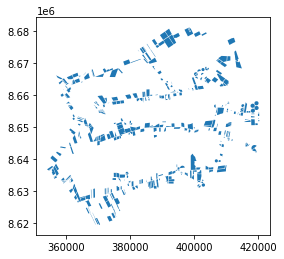

In [10]:
shp1 = "/content/shapes/LEM_2017_2018_mensal_training.shp"
shp2 = "/content/shapes/luiz_eduardo.shp"
shapefile = gpd.read_file(shp1)
aoi = gpd.read_file(shp2)
shapefile.plot()

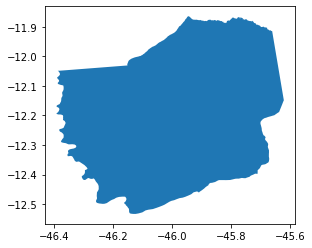

In [11]:
aoi.plot()

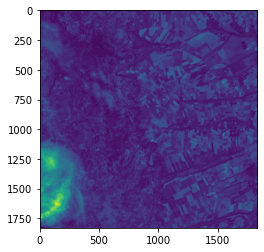

In [0]:
s2_img1 = "/content/img/sentinel2/S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/L2A_T23LLG_A010188_20170604T132235/IMG_DATA/R60m/L2A_T23LLG_20170604T132241_B04_60m.jp2"
raster = rasterio.open(s2_img1)
plt.imshow(raster.read(1))

In [0]:
%time
b08 = "/content/img/sentinel2/S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/L2A_T23LLG_A010188_20170604T132235/IMG_DATA/R60m/L2A_T23LLG_20170604T132241_B8A_60m.jp2"
b04 = "/content/img/sentinel2/S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/L2A_T23LLG_A010188_20170604T132235/IMG_DATA/R60m/L2A_T23LLG_20170604T132241_B04_60m.jp2"
b03 = "/content/img/sentinel2/S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/L2A_T23LLG_A010188_20170604T132235/IMG_DATA/R60m/L2A_T23LLG_20170604T132241_B03_60m.jp2"
b02 = "/content/img/sentinel2/S2A_MSIL2A_20170604T132241_N0205_R038_T23LLG_20170604T132235.SAFE/GRANULE/L2A_T23LLG_A010188_20170604T132235/IMG_DATA/R60m/L2A_T23LLG_20170604T132241_B02_60m.jp2"
extraction.extract(src_vector=shp1,
                   burn_attribute="Id",
                   src_raster=[b02,b03,b04,b08],
                   dst_names=["in_02","in_03","in_04","in_08"],
                   dst_dir="/content/dataset",
                   n_jobs=-1
                   )

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


0

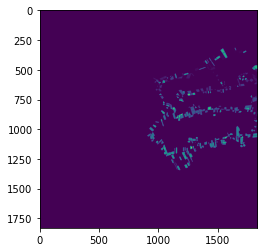

In [0]:
result_img = "/content/dataset/burn_attribute_rasterized_Id.tif"
result_raster = rasterio.open(result_img)
plt.imshow(result_raster.read(1))

In [0]:
from shapely.geometry import Point
# extraction.load_extracted("/content/dataset", patterns=["aux*.npy"])
extract_df = extraction.load_extracted("/content/dataset", patterns=["aux_*.npy", "in_*??.npy"])
geometry = [Point(xy) for xy in zip(extract_df.aux_coord_x, extract_df.aux_coord_y)]
gdf_extracted = gpd.GeoDataFrame(
    extract_df, 
    crs={'init': 'epsg:32723'}, 
    geometry=geometry
)
gdf_extracted.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,aux_coord_x,aux_coord_y,aux_vector_Id,in_02,in_04,in_08,in_03,geometry
0,398490.0,8681110.0,6,350,782,2614,659,POINT (398490.000 8681110.000)
1,398430.0,8681050.0,6,413,828,2464,701,POINT (398430.000 8681050.000)
2,398490.0,8681050.0,6,414,857,2493,722,POINT (398490.000 8681050.000)
3,398430.0,8680990.0,6,391,802,2622,690,POINT (398430.000 8680990.000)
4,398490.0,8680990.0,6,393,813,2546,689,POINT (398490.000 8680990.000)


In [0]:
gdf_extracted["ndvi"] = (gdf_extracted["in_08"] - gdf_extracted["in_04"])/(gdf_extracted["in_08"] + gdf_extracted["in_04"])
gdf_extracted.head()

,aux_coord_x,aux_coord_y,aux_vector_Id,in_02,in_04,in_08,in_03,geometry,ndvi
0,398490.0,8681110.0,6,350,782,2614,659,POINT (398490.000 8681110.000),0.539458
1,398430.0,8681050.0,6,413,828,2464,701,POINT (398430.000 8681050.000),0.496962
2,398490.0,8681050.0,6,414,857,2493,722,POINT (398490.000 8681050.000),0.488358
3,398430.0,8680990.0,6,391,802,2622,690,POINT (398430.000 8680990.000),0.531542
4,398490.0,8680990.0,6,393,813,2546,689,POINT (398490.000 8680990.000),0.515927


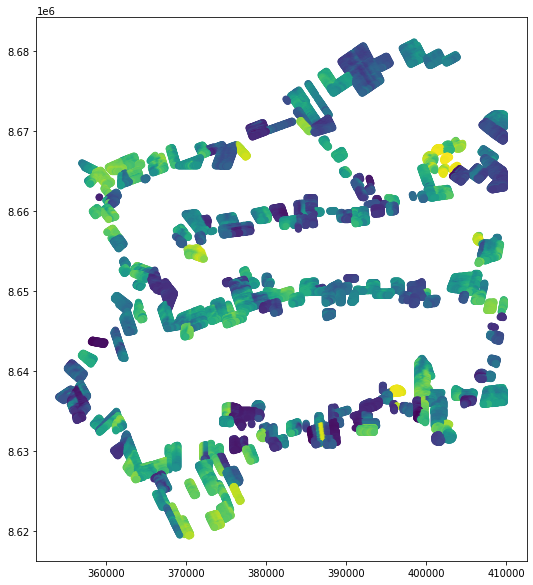

In [0]:
gdf_extracted.plot(column="ndvi",figsize=(10,10))

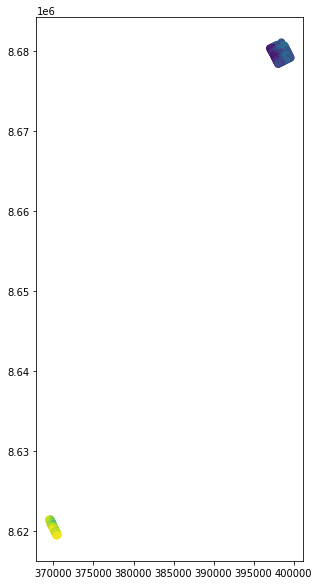

In [0]:
gdf_extracted[gdf_extracted["aux_vector_Id"].isin([6,563])].plot(column="ndvi",figsize=(10,10))

In [0]:
in_b02 = result_raster = rasterio.open(b02).read(1)
in_b03 = result_raster = rasterio.open(b03).read(1)
in_b04 = result_raster = rasterio.open(b04).read(1)
in_b08 = result_raster = rasterio.open(b08).read(1)
in_ndvi = (in_b08 -in_b04 )/(in_b08 +in_b04)*500

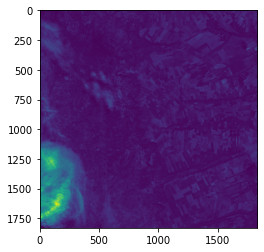

In [0]:
plt.imshow(in_b02)

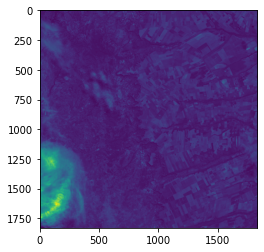

In [0]:
plt.imshow(in_b03)

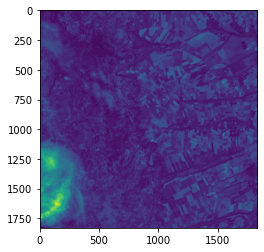

In [0]:
plt.imshow(in_b04)

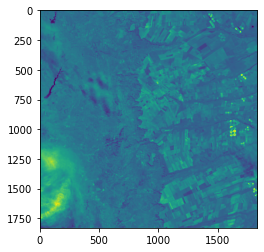

In [0]:
plt.imshow(in_b08)

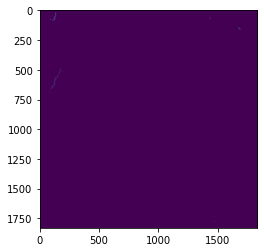

In [0]:
plt.imshow(in_ndvi)

## I.A

In [0]:
!unzip /content/dataset_in.zip

Archive:  /content/dataset_in.zip
  inflating: dataset_in.csv          


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv("/content/dataset_in.csv")
df.head()

,Unnamed: 0,x,y,in_b02,in_b03,in_b04,in_b08,result,in_ndvi
0,0,0,0,150,374,208,3032,0,0.871605
1,1,0,1,174,405,242,2821,0,0.841985
2,2,0,2,171,367,242,2348,0,0.813127
3,3,0,3,183,404,279,2203,0,0.775181
4,4,0,4,332,604,625,2332,0,0.577274


In [0]:
ndvi_temp = df['in_ndvi']
df = df/df.max()
df['in_ndvi'] = ndvi_temp
df = df.drop(["Unnamed: 0","x","y"],axis=1)
df.loc[df["result"] > 0, 'result'] = 1
df

,in_b02,in_b03,in_b04,in_b08,result,in_ndvi
0,0.018701,0.049159,0.029222,0.428249,0.0,0.871605
1,0.021693,0.053233,0.033998,0.398446,0.0,0.841985
2,0.021319,0.048239,0.033998,0.331638,0.0,0.813127
3,0.022815,0.053102,0.039196,0.311158,0.0,0.775181
4,0.041391,0.079390,0.087806,0.329379,0.0,0.577274
...,...,...,...,...,...,...
3348895,0.037651,0.084911,0.097921,0.373023,0.0,0.582385
3348896,0.032041,0.076104,0.082607,0.364124,0.0,0.628553
3348897,0.040020,0.086488,0.099607,0.363277,0.0,0.567815
3348898,0.040643,0.086619,0.097640,0.366384,0.0,0.577379


In [0]:
arr_out = []
result_column= df["result"]
for i in range(3348900):
  if(result_column[i] == 1):
    arr_out.append([0,1])
  else:
    arr_out.append([1,0])
np.array(arr_out)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [0]:
result_img = []
for i in range(0,1830):
  col = []
  for j in range(0,1830):
    col.append(df['result'][j+i*1830])
  result_img.append(col)
result_img = np.array(result_img)
result_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

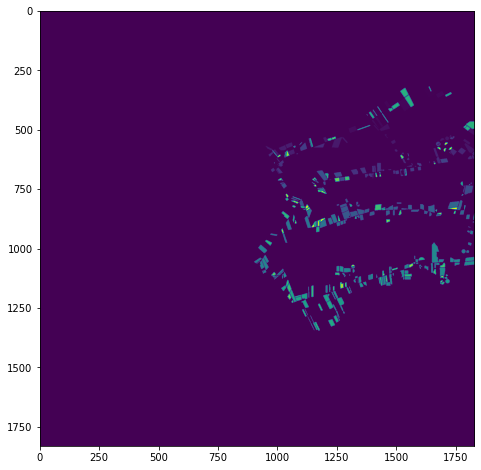

In [0]:
plt.figure(figsize = (8,8))
plt.imshow(result_img)

In [0]:
y = np.array(arr_out)
x = df.drop(columns="result",axis=0).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [0]:
x_train

array([[0.02169306, 0.05218191, 0.04748525, 0.66101695, 0.86528497],
       [0.06146366, 0.09621451, 0.09314414, 0.35762712, 0.58497653],
       [0.44009475, 0.45872766, 0.45855577, 0.59265537, 0.12493298],
       ...,
       [0.08116195, 0.12868034, 0.19935375, 0.36384181, 0.28961202],
       [0.07692308, 0.13577813, 0.22562518, 0.32245763, 0.17408074],
       [0.04151602, 0.10725552, 0.09960663, 0.49661017, 0.6643787 ]])

In [0]:
y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [0]:
model = Sequential()
input_shape = x_train[0].shape
model.add(Dense(5,activation='relu',input_shape=input_shape))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_62 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 6         
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["acc"])

In [0]:
model.fit(x_train,y_train, epochs=100, batch_size=50000, shuffle=True)

Epoch 1/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.6873 - acc: 0.5772
Epoch 2/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.6538 - acc: 0.9612
Epoch 3/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.6225 - acc: 0.7880
Epoch 4/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.5758 - acc: 0.5000
Epoch 5/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.5282 - acc: 0.5000
Epoch 6/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.4869 - acc: 0.5000
Epoch 7/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.4490 - acc: 0.5070
Epoch 8/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.4133 - acc: 0.9381
Epoch 9/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.3793 - acc: 0.9781
Epoch 10/100
2344230/2344230 [==============================] - 

In [0]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [0]:
preds = model.predict(x,batch_size=50000)
preds

array([[0.991736  , 0.01004894],
       [0.9931202 , 0.00863287],
       [0.9955438 , 0.00602362],
       ...,
       [0.9809178 , 0.02010596],
       [0.98217195, 0.01900396],
       [0.9832118 , 0.0180803 ]], dtype=float32)

In [0]:
img_pred = []
def eps(n):
  return n > 0.033
  # return n > 0.045
for i in range(0,1830):
  img_pred.append([])
  for j in range(0,1830):
    img_pred[i].append(1 if eps(preds[j+i*1830][1]) else 0)
    # img_pred[i].append(preds[j+i*1830])
img_pred = np.array(img_pred)
img_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

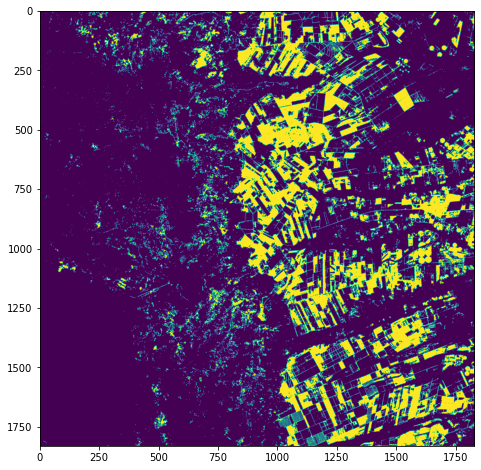

In [0]:
plt.figure(figsize = (8,8))
plt.imshow(img_pred)